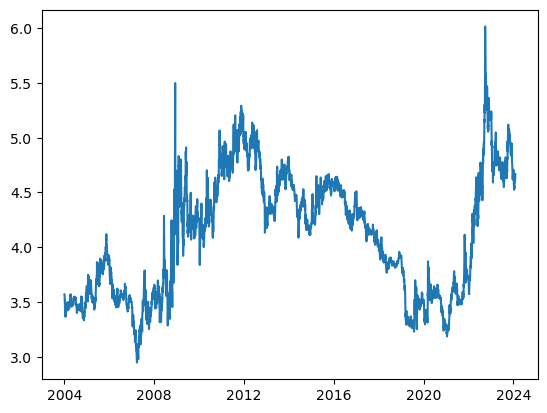

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

# Replace 'your_file.xlsx' with the path to your Excel file
# Replace 'Sheet1' with the name of the sheet you want to load
df = pd.read_excel('/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATM_10Y_10Y_from_2004_2024.xlsx', sheet_name='Ark1', engine='openpyxl')

plt.plot(df["Dato"],df["ATM_10Y_10Y"])